# Exploratory Data Analysis

In [1]:
# Find JIRA dataset file from local Drive
!dir input

 Volume in drive C is Windows
 Volume Serial Number is 80A8-9307

 Directory of C:\Users\rahul\Desktop\Hackathon 2023\hackathon2023\input

11-07-2023  20:53    <DIR>          .
11-07-2023  20:53    <DIR>          ..
10-07-2023  15:27            46,712 Emp_data.csv
11-07-2023  20:53            54,560 Emp_data_v2.csv
10-07-2023  15:27            14,485 move_in_sync_data.csv
11-07-2023  20:53            14,485 move_in_sync_data_v2.csv
10-07-2023  15:27            27,146 vendor.csv
11-07-2023  20:53            28,883 vendor_v2.csv
               6 File(s)        186,271 bytes
               2 Dir(s)  53,230,796,800 bytes free


In [2]:
# Import labraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from prophet import Prophet

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=(FutureWarning))

### Load datasets

In [3]:
employee_df = pd.read_csv('input/Emp_data_v2.csv')
employee_df.head()

EMP_ID Location          Swipe_In         Swipe_Out  day  Unnamed: 5  \
0  8626487      MUM  04-10-2022 15:23  05-10-2022 01:23  Tue         NaN   
1  8631177      MUM  08-06-2023 21:17  09-06-2023 07:17  Thu         NaN   
2  8678631      MGP  23-12-2022 10:18  23-12-2022 19:18  Fri         NaN   
3  8574819       BB  03-08-2022 18:26  04-08-2022 05:26  Wed         NaN   
4  8587539      MGP  12-01-2023 12:57  12-01-2023 18:57  Thu         NaN   

   Unnamed: 6  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

In [4]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   EMP_ID      1035 non-null   int64  
 1   Location    1035 non-null   object 
 2   Swipe_In    1035 non-null   object 
 3   Swipe_Out   1035 non-null   object 
 4   day         1035 non-null   object 
 5   Unnamed: 5  0 non-null      float64
 6   Unnamed: 6  0 non-null      float64
dtypes: float64(2), int64(1), object(4)
memory usage: 56.7+ KB


In [5]:
# Convert to pandas datetime format
employee_df['Swipe_In']=pd.to_datetime(employee_df['Swipe_In'],  format='%d-%m-%Y %H:%M')
employee_df['Swipe_Out']=pd.to_datetime(employee_df['Swipe_Out'],  format='%d-%m-%Y %H:%M')

In [6]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   EMP_ID      1035 non-null   int64         
 1   Location    1035 non-null   object        
 2   Swipe_In    1035 non-null   datetime64[ns]
 3   Swipe_Out   1035 non-null   datetime64[ns]
 4   day         1035 non-null   object        
 5   Unnamed: 5  0 non-null      float64       
 6   Unnamed: 6  0 non-null      float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(2)
memory usage: 56.7+ KB


In [7]:
employee_df['Location'].value_counts()

Location
MGP    359
MUM    339
BB     337
Name: count, dtype: int64

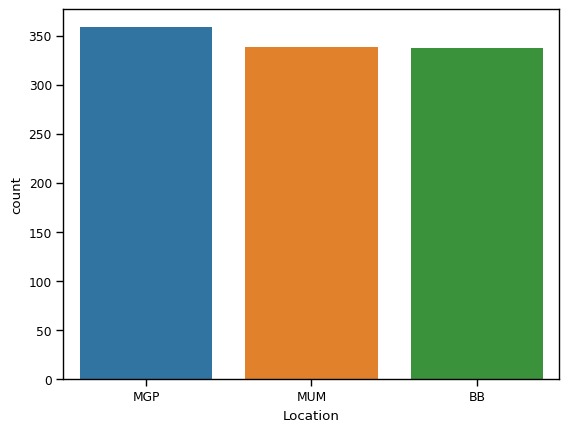

In [8]:
sns.set_context('paper')
sns.barplot(x=employee_df.Location.value_counts().index, y=employee_df.Location.value_counts())
plt.show()

In [9]:
employee_df.head()

EMP_ID Location            Swipe_In           Swipe_Out  day  Unnamed: 5  \
0  8626487      MUM 2022-10-04 15:23:00 2022-10-05 01:23:00  Tue         NaN   
1  8631177      MUM 2023-06-08 21:17:00 2023-06-09 07:17:00  Thu         NaN   
2  8678631      MGP 2022-12-23 10:18:00 2022-12-23 19:18:00  Fri         NaN   
3  8574819       BB 2022-08-03 18:26:00 2022-08-04 05:26:00  Wed         NaN   
4  8587539      MGP 2023-01-12 12:57:00 2023-01-12 18:57:00  Thu         NaN   

   Unnamed: 6  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

# Comute dataset

In [10]:
comute_df = pd.read_csv('input/move_in_sync_data_v2.csv')
comute_df.head()

EMP_ID Location Car_Park  Commute_to_office_mins  Commute_from_office_mins
0  8626487      MGP       NO                    21.0                      32.0
1  8631177      MUM      YES                     NaN                       NaN
2  8678631       BB       NO                    99.0                     200.0
3  8574819      MUM      YES                     NaN                       NaN
4  8587539       BB      YES                     NaN                       NaN

In [11]:
new_df = pd.merge(employee_df, comute_df, on=["EMP_ID","Location"], how="left")

In [12]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   EMP_ID                    1035 non-null   int64         
 1   Location                  1035 non-null   object        
 2   Swipe_In                  1035 non-null   datetime64[ns]
 3   Swipe_Out                 1035 non-null   datetime64[ns]
 4   day                       1035 non-null   object        
 5   Unnamed: 5                0 non-null      float64       
 6   Unnamed: 6                0 non-null      float64       
 7   Car_Park                  265 non-null    object        
 8   Commute_to_office_mins    134 non-null    float64       
 9   Commute_from_office_mins  134 non-null    float64       
dtypes: datetime64[ns](2), float64(4), int64(1), object(3)
memory usage: 81.0+ KB


In [13]:
new_df.head()

EMP_ID Location            Swipe_In           Swipe_Out  day  Unnamed: 5  \
0  8626487      MUM 2022-10-04 15:23:00 2022-10-05 01:23:00  Tue         NaN   
1  8631177      MUM 2023-06-08 21:17:00 2023-06-09 07:17:00  Thu         NaN   
2  8678631      MGP 2022-12-23 10:18:00 2022-12-23 19:18:00  Fri         NaN   
3  8574819       BB 2022-08-03 18:26:00 2022-08-04 05:26:00  Wed         NaN   
4  8587539      MGP 2023-01-12 12:57:00 2023-01-12 18:57:00  Thu         NaN   

   Unnamed: 6 Car_Park  Commute_to_office_mins  Commute_from_office_mins  
0         NaN      NaN                     NaN                       NaN  
1         NaN      YES                     NaN                       NaN  
2         NaN      NaN                     NaN                       NaN  
3         NaN      NaN                     NaN                       NaN  
4         NaN      NaN                     NaN                       NaN

In [14]:
# Considering Swipe_in date as working date
new_df['Working_Date'] = new_df['Swipe_In'].dt.date

In [15]:
new_df.head()

EMP_ID Location            Swipe_In           Swipe_Out  day  Unnamed: 5  \
0  8626487      MUM 2022-10-04 15:23:00 2022-10-05 01:23:00  Tue         NaN   
1  8631177      MUM 2023-06-08 21:17:00 2023-06-09 07:17:00  Thu         NaN   
2  8678631      MGP 2022-12-23 10:18:00 2022-12-23 19:18:00  Fri         NaN   
3  8574819       BB 2022-08-03 18:26:00 2022-08-04 05:26:00  Wed         NaN   
4  8587539      MGP 2023-01-12 12:57:00 2023-01-12 18:57:00  Thu         NaN   

   Unnamed: 6 Car_Park  Commute_to_office_mins  Commute_from_office_mins  \
0         NaN      NaN                     NaN                       NaN   
1         NaN      YES                     NaN                       NaN   
2         NaN      NaN                     NaN                       NaN   
3         NaN      NaN                     NaN                       NaN   
4         NaN      NaN                     NaN                       NaN   

  Working_Date  
0   2022-10-04  
1   2023-06-08  
2   2022-12-23  
3   2022-08-03  
4   2023-01-12

In [16]:
new_df = new_df.loc[:, ~new_df.columns.str.contains('^Unnamed')]
new_df.drop(columns=['day'], inplace=True)

In [17]:
new_df['dayofweek'] = new_df['Swipe_In'].dt.dayofweek

In [18]:
new_df.head()

EMP_ID Location            Swipe_In           Swipe_Out Car_Park  \
0  8626487      MUM 2022-10-04 15:23:00 2022-10-05 01:23:00      NaN   
1  8631177      MUM 2023-06-08 21:17:00 2023-06-09 07:17:00      YES   
2  8678631      MGP 2022-12-23 10:18:00 2022-12-23 19:18:00      NaN   
3  8574819       BB 2022-08-03 18:26:00 2022-08-04 05:26:00      NaN   
4  8587539      MGP 2023-01-12 12:57:00 2023-01-12 18:57:00      NaN   

   Commute_to_office_mins  Commute_from_office_mins Working_Date  dayofweek  
0                     NaN                       NaN   2022-10-04          1  
1                     NaN                       NaN   2023-06-08          3  
2                     NaN                       NaN   2022-12-23          4  
3                     NaN                       NaN   2022-08-03          2  
4                     NaN                       NaN   2023-01-12          3

In [19]:
# map the day of the week number to its name
new_df['dayofweek'] = new_df['dayofweek'].map({
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
})

In [20]:
new_df.head()

EMP_ID Location            Swipe_In           Swipe_Out Car_Park  \
0  8626487      MUM 2022-10-04 15:23:00 2022-10-05 01:23:00      NaN   
1  8631177      MUM 2023-06-08 21:17:00 2023-06-09 07:17:00      YES   
2  8678631      MGP 2022-12-23 10:18:00 2022-12-23 19:18:00      NaN   
3  8574819       BB 2022-08-03 18:26:00 2022-08-04 05:26:00      NaN   
4  8587539      MGP 2023-01-12 12:57:00 2023-01-12 18:57:00      NaN   

   Commute_to_office_mins  Commute_from_office_mins Working_Date  dayofweek  
0                     NaN                       NaN   2022-10-04    Tuesday  
1                     NaN                       NaN   2023-06-08   Thursday  
2                     NaN                       NaN   2022-12-23     Friday  
3                     NaN                       NaN   2022-08-03  Wednesday  
4                     NaN                       NaN   2023-01-12   Thursday

In [21]:
final_df = new_df[['Location','Swipe_In','Swipe_Out','Car_Park','Working_Date','dayofweek']]

In [22]:
final_df.head()

Location            Swipe_In           Swipe_Out Car_Park Working_Date  \
0      MUM 2022-10-04 15:23:00 2022-10-05 01:23:00      NaN   2022-10-04   
1      MUM 2023-06-08 21:17:00 2023-06-09 07:17:00      YES   2023-06-08   
2      MGP 2022-12-23 10:18:00 2022-12-23 19:18:00      NaN   2022-12-23   
3       BB 2022-08-03 18:26:00 2022-08-04 05:26:00      NaN   2022-08-03   
4      MGP 2023-01-12 12:57:00 2023-01-12 18:57:00      NaN   2023-01-12   

   dayofweek  
0    Tuesday  
1   Thursday  
2     Friday  
3  Wednesday  
4   Thursday

# Vendor dataset Cleaning

In [23]:
vendor_df = pd.read_csv('input/vendor_v2.csv')
vendor_df.head()

Vendor              Date  Transaction_Value  Unnamed: 3  day
0  ANTARANG  01-09-2022 07:56                289         NaN  Thu
1     SWARA  07-02-2023 04:07                440         NaN  Tue
2    SUBWAY  09-03-2023 07:48                155         NaN  Thu
3     SWARA  29-05-2023 02:57                312         NaN  Mon
4   VOHUMAN  13-03-2023 14:18                459         NaN  Mon

In [24]:
# Convert to pandas datetime format
vendor_df['Date']=pd.to_datetime(vendor_df['Date'],  format='%d-%m-%Y %H:%M')

In [25]:
vendor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Vendor             808 non-null    object        
 1   Date               808 non-null    datetime64[ns]
 2   Transaction_Value  808 non-null    int64         
 3   Unnamed: 3         0 non-null      float64       
 4   day                808 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 31.7+ KB


In [26]:
vendor_df['dayofweek'] = vendor_df['Date'].dt.dayofweek

In [27]:
# map the day of the week number to its name
vendor_df['dayofweek'] = vendor_df['dayofweek'].map({
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
})

In [28]:
vendor_df.head()

Vendor                Date  Transaction_Value  Unnamed: 3  day dayofweek
0  ANTARANG 2022-09-01 07:56:00                289         NaN  Thu  Thursday
1     SWARA 2023-02-07 04:07:00                440         NaN  Tue   Tuesday
2    SUBWAY 2023-03-09 07:48:00                155         NaN  Thu  Thursday
3     SWARA 2023-05-29 02:57:00                312         NaN  Mon    Monday
4   VOHUMAN 2023-03-13 14:18:00                459         NaN  Mon    Monday

In [29]:
vendor_df = vendor_df.loc[:, ~vendor_df.columns.str.contains('^Unnamed')]

In [30]:
vendor_df.drop(columns=['day'], inplace=True)

In [31]:
vendor_df['Transaction_Date'] = vendor_df['Date'].dt.date

In [32]:
vendor_df.head()

Vendor                Date  Transaction_Value dayofweek Transaction_Date
0  ANTARANG 2022-09-01 07:56:00                289  Thursday       2022-09-01
1     SWARA 2023-02-07 04:07:00                440   Tuesday       2023-02-07
2    SUBWAY 2023-03-09 07:48:00                155  Thursday       2023-03-09
3     SWARA 2023-05-29 02:57:00                312    Monday       2023-05-29
4   VOHUMAN 2023-03-13 14:18:00                459    Monday       2023-03-13

# Analysis 

In [33]:
final_df.head()

Location            Swipe_In           Swipe_Out Car_Park Working_Date  \
0      MUM 2022-10-04 15:23:00 2022-10-05 01:23:00      NaN   2022-10-04   
1      MUM 2023-06-08 21:17:00 2023-06-09 07:17:00      YES   2023-06-08   
2      MGP 2022-12-23 10:18:00 2022-12-23 19:18:00      NaN   2022-12-23   
3       BB 2022-08-03 18:26:00 2022-08-04 05:26:00      NaN   2022-08-03   
4      MGP 2023-01-12 12:57:00 2023-01-12 18:57:00      NaN   2023-01-12   

   dayofweek  
0    Tuesday  
1   Thursday  
2     Friday  
3  Wednesday  
4   Thursday

<Axes: >

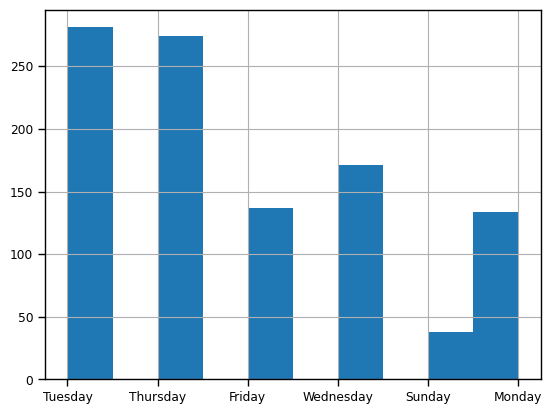

In [34]:
# Draw a histogram of a column (the distribution of dayofweek).
final_df.dayofweek.hist()

In [35]:
final_df.dayofweek.value_counts()  

dayofweek
Tuesday      281
Thursday     274
Wednesday    171
Friday       137
Monday       134
Sunday        38
Name: count, dtype: int64

<Axes: >

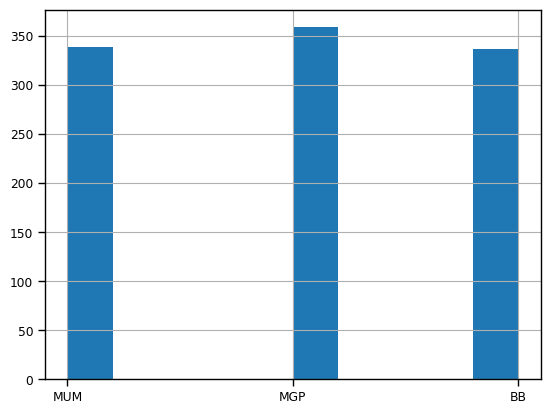

In [36]:
# Draw a histogram of a column (the distribution of dayofweek).
final_df.Location.hist()

In [37]:
final_df.Location.value_counts()  

Location
MGP    359
MUM    339
BB     337
Name: count, dtype: int64

In [38]:
#final_df = final_df.set_index('Working_Date')

In [39]:
final_df.head()

Location            Swipe_In           Swipe_Out Car_Park Working_Date  \
0      MUM 2022-10-04 15:23:00 2022-10-05 01:23:00      NaN   2022-10-04   
1      MUM 2023-06-08 21:17:00 2023-06-09 07:17:00      YES   2023-06-08   
2      MGP 2022-12-23 10:18:00 2022-12-23 19:18:00      NaN   2022-12-23   
3       BB 2022-08-03 18:26:00 2022-08-04 05:26:00      NaN   2022-08-03   
4      MGP 2023-01-12 12:57:00 2023-01-12 18:57:00      NaN   2023-01-12   

   dayofweek  
0    Tuesday  
1   Thursday  
2     Friday  
3  Wednesday  
4   Thursday

In [40]:
final_df['Year'] = final_df.Swipe_In.dt.year
final_df['Month'] = final_df.Swipe_In.dt.month

C:\Users\rahul\AppData\Local\Temp\ipykernel_9728\3861290927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Year'] = final_df.Swipe_In.dt.year
C:\Users\rahul\AppData\Local\Temp\ipykernel_9728\3861290927.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Month'] = final_df.Swipe_In.dt.month


In [41]:
final_df.head()

Location            Swipe_In           Swipe_Out Car_Park Working_Date  \
0      MUM 2022-10-04 15:23:00 2022-10-05 01:23:00      NaN   2022-10-04   
1      MUM 2023-06-08 21:17:00 2023-06-09 07:17:00      YES   2023-06-08   
2      MGP 2022-12-23 10:18:00 2022-12-23 19:18:00      NaN   2022-12-23   
3       BB 2022-08-03 18:26:00 2022-08-04 05:26:00      NaN   2022-08-03   
4      MGP 2023-01-12 12:57:00 2023-01-12 18:57:00      NaN   2023-01-12   

   dayofweek  Year  Month  
0    Tuesday  2022     10  
1   Thursday  2023      6  
2     Friday  2022     12  
3  Wednesday  2022      8  
4   Thursday  2023      1

In [42]:
final_df[final_df.Year == 2022]

Location            Swipe_In           Swipe_Out Car_Park Working_Date  \
0         MUM 2022-10-04 15:23:00 2022-10-05 01:23:00      NaN   2022-10-04   
2         MGP 2022-12-23 10:18:00 2022-12-23 19:18:00      NaN   2022-12-23   
3          BB 2022-08-03 18:26:00 2022-08-04 05:26:00      NaN   2022-08-03   
7         MUM 2022-09-13 23:39:00 2022-09-14 11:39:00       NO   2022-09-13   
13         BB 2022-12-13 07:45:00 2022-12-13 15:45:00      NaN   2022-12-13   
...       ...                 ...                 ...      ...          ...   
1014      MGP 2022-07-21 06:12:00 2022-07-21 17:12:00      NaN   2022-07-21   
1022      MGP 2022-09-29 19:13:00 2022-09-30 01:13:00      NaN   2022-09-29   
1023       BB 2022-12-08 22:09:00 2022-12-09 06:09:00      NaN   2022-12-08   
1024      MUM 2022-12-08 05:21:00 2022-12-08 11:21:00      NaN   2022-12-08   
1031       BB 2022-09-08 00:45:00 2022-09-08 09:45:00      NaN   2022-09-08   

      dayofweek  Year  Month  
0       Tuesday  2022     10  
2        Friday  2022     12  
3     Wednesday  2022      8  
7       Tuesday  2022      9  
13      Tuesday  2022     12  
...         ...   ...    ...  
1014   Thursday  2022      7  
1022   Thursday  2022      9  
1023   Thursday  2022     12  
1024   Thursday  2022     12  
1031   Thursday  2022      9  

[495 rows x 8 columns]

In [43]:
#final_df.index =  pd.to_datetime(final_df.index)

In [44]:
final_df.head()

Location            Swipe_In           Swipe_Out Car_Park Working_Date  \
0      MUM 2022-10-04 15:23:00 2022-10-05 01:23:00      NaN   2022-10-04   
1      MUM 2023-06-08 21:17:00 2023-06-09 07:17:00      YES   2023-06-08   
2      MGP 2022-12-23 10:18:00 2022-12-23 19:18:00      NaN   2022-12-23   
3       BB 2022-08-03 18:26:00 2022-08-04 05:26:00      NaN   2022-08-03   
4      MGP 2023-01-12 12:57:00 2023-01-12 18:57:00      NaN   2023-01-12   

   dayofweek  Year  Month  
0    Tuesday  2022     10  
1   Thursday  2023      6  
2     Friday  2022     12  
3  Wednesday  2022      8  
4   Thursday  2023      1

<Axes: >

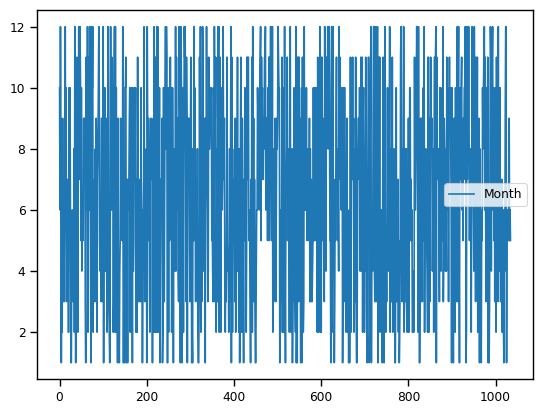

In [45]:
final_df[['Month']].plot()

In [46]:
final_df.head()

Location            Swipe_In           Swipe_Out Car_Park Working_Date  \
0      MUM 2022-10-04 15:23:00 2022-10-05 01:23:00      NaN   2022-10-04   
1      MUM 2023-06-08 21:17:00 2023-06-09 07:17:00      YES   2023-06-08   
2      MGP 2022-12-23 10:18:00 2022-12-23 19:18:00      NaN   2022-12-23   
3       BB 2022-08-03 18:26:00 2022-08-04 05:26:00      NaN   2022-08-03   
4      MGP 2023-01-12 12:57:00 2023-01-12 18:57:00      NaN   2023-01-12   

   dayofweek  Year  Month  
0    Tuesday  2022     10  
1   Thursday  2023      6  
2     Friday  2022     12  
3  Wednesday  2022      8  
4   Thursday  2023      1

In [47]:
vendor_df.head()

Vendor                Date  Transaction_Value dayofweek Transaction_Date
0  ANTARANG 2022-09-01 07:56:00                289  Thursday       2022-09-01
1     SWARA 2023-02-07 04:07:00                440   Tuesday       2023-02-07
2    SUBWAY 2023-03-09 07:48:00                155  Thursday       2023-03-09
3     SWARA 2023-05-29 02:57:00                312    Monday       2023-05-29
4   VOHUMAN 2023-03-13 14:18:00                459    Monday       2023-03-13

In [48]:
#vendor_df= vendor_df.set_index('Transaction_Date')

In [49]:
vendor_df.head()

Vendor                Date  Transaction_Value dayofweek Transaction_Date
0  ANTARANG 2022-09-01 07:56:00                289  Thursday       2022-09-01
1     SWARA 2023-02-07 04:07:00                440   Tuesday       2023-02-07
2    SUBWAY 2023-03-09 07:48:00                155  Thursday       2023-03-09
3     SWARA 2023-05-29 02:57:00                312    Monday       2023-05-29
4   VOHUMAN 2023-03-13 14:18:00                459    Monday       2023-03-13

In [50]:
dataframe = pd.merge(final_df, vendor_df, left_index=True, right_index=True)

In [51]:
dataframe.head()

Location            Swipe_In           Swipe_Out Car_Park Working_Date  \
0      MUM 2022-10-04 15:23:00 2022-10-05 01:23:00      NaN   2022-10-04   
1      MUM 2023-06-08 21:17:00 2023-06-09 07:17:00      YES   2023-06-08   
2      MGP 2022-12-23 10:18:00 2022-12-23 19:18:00      NaN   2022-12-23   
3       BB 2022-08-03 18:26:00 2022-08-04 05:26:00      NaN   2022-08-03   
4      MGP 2023-01-12 12:57:00 2023-01-12 18:57:00      NaN   2023-01-12   

  dayofweek_x  Year  Month    Vendor                Date  Transaction_Value  \
0     Tuesday  2022     10  ANTARANG 2022-09-01 07:56:00                289   
1    Thursday  2023      6     SWARA 2023-02-07 04:07:00                440   
2      Friday  2022     12    SUBWAY 2023-03-09 07:48:00                155   
3   Wednesday  2022      8     SWARA 2023-05-29 02:57:00                312   
4    Thursday  2023      1   VOHUMAN 2023-03-13 14:18:00                459   

  dayofweek_y Transaction_Date  
0    Thursday       2022-09-01  
1     Tuesday       2023-02-07  
2    Thursday       2023-03-09  
3      Monday       2023-05-29  
4      Monday       2023-03-13

In [52]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 808 entries, 0 to 807
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Location           808 non-null    object        
 1   Swipe_In           808 non-null    datetime64[ns]
 2   Swipe_Out          808 non-null    datetime64[ns]
 3   Car_Park           249 non-null    object        
 4   Working_Date       808 non-null    object        
 5   dayofweek_x        808 non-null    object        
 6   Year               808 non-null    int32         
 7   Month              808 non-null    int32         
 8   Vendor             808 non-null    object        
 9   Date               808 non-null    datetime64[ns]
 10  Transaction_Value  808 non-null    int64         
 11  dayofweek_y        808 non-null    object        
 12  Transaction_Date   808 non-null    object        
dtypes: datetime64[ns](3), int32(2), int64(1), object(7)
memory usage: 82.1

In [53]:
# Drop more than 50 % Null values columns
dataframe.drop(columns=['Car_Park','dayofweek_y'], inplace=True)

In [54]:
dataframe.head()

Location            Swipe_In           Swipe_Out Working_Date dayofweek_x  \
0      MUM 2022-10-04 15:23:00 2022-10-05 01:23:00   2022-10-04     Tuesday   
1      MUM 2023-06-08 21:17:00 2023-06-09 07:17:00   2023-06-08    Thursday   
2      MGP 2022-12-23 10:18:00 2022-12-23 19:18:00   2022-12-23      Friday   
3       BB 2022-08-03 18:26:00 2022-08-04 05:26:00   2022-08-03   Wednesday   
4      MGP 2023-01-12 12:57:00 2023-01-12 18:57:00   2023-01-12    Thursday   

   Year  Month    Vendor                Date  Transaction_Value  \
0  2022     10  ANTARANG 2022-09-01 07:56:00                289   
1  2023      6     SWARA 2023-02-07 04:07:00                440   
2  2022     12    SUBWAY 2023-03-09 07:48:00                155   
3  2022      8     SWARA 2023-05-29 02:57:00                312   
4  2023      1   VOHUMAN 2023-03-13 14:18:00                459   

  Transaction_Date  
0       2022-09-01  
1       2023-02-07  
2       2023-03-09  
3       2023-05-29  
4       2023-03-13

In [55]:
dataframe.Vendor.unique().tolist()

['ANTARANG',
 'SWARA',
 'SUBWAY',
 'VOHUMAN',
 'WOK',
 'BISTRO',
 'SOUTHERN EXPRESS',
 'JUICE BAR']

In [56]:
import plotly.express as px

In [57]:
#dataframe.index.value_counts().values.tolist()

In [58]:
dataframe.Vendor.value_counts()
# dataframe.groupby('Vendor').Vendor.count()

Vendor
ANTARANG            169
SOUTHERN EXPRESS    122
SWARA               109
WOK                  92
VOHUMAN              84
SUBWAY               82
BISTRO               75
JUICE BAR            75
Name: count, dtype: int64

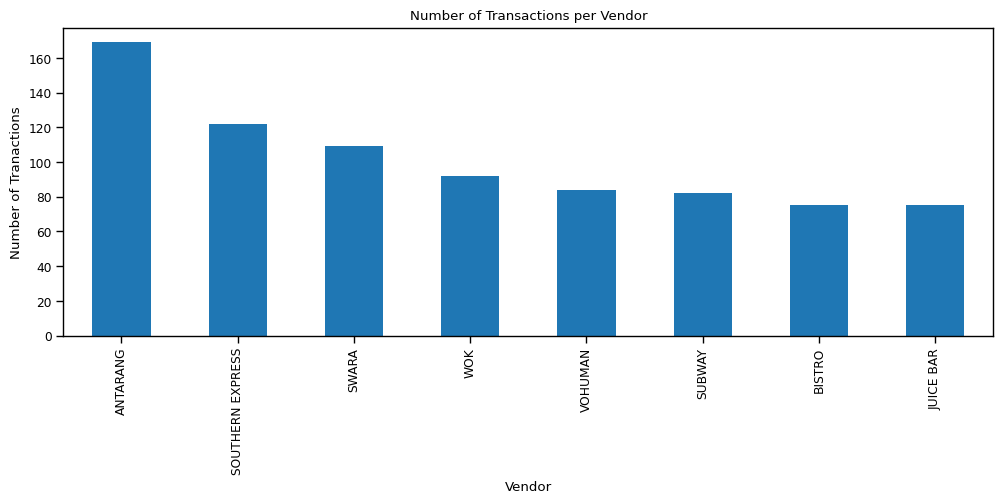

In [59]:
dataframe.Vendor.value_counts().plot(kind='bar',figsize=(12,4)) 
plt.xlabel('Vendor');
plt.ylabel('Number of Tranactions');
plt.title('Number of Transactions per Vendor');

In [60]:
dataframe.reset_index(level=0, inplace=True)

In [61]:
dataframe.groupby('Vendor').Transaction_Value.mean()

Vendor
ANTARANG            261.745562
BISTRO              285.413333
JUICE BAR           246.373333
SOUTHERN EXPRESS    281.106557
SUBWAY              254.073171
SWARA               277.412844
VOHUMAN             264.630952
WOK                 250.358696
Name: Transaction_Value, dtype: float64

<Axes: >

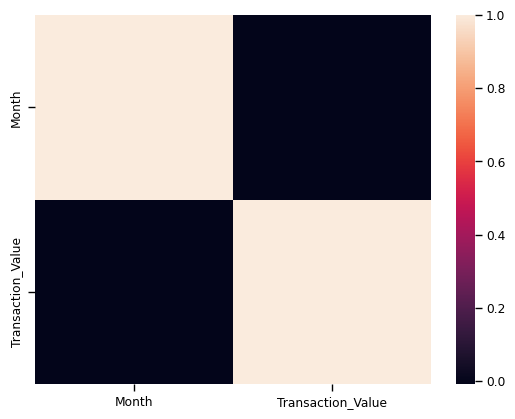

In [62]:
sns.heatmap(dataframe[['Month','Transaction_Value']].corr())

C:\Users\rahul\anaconda3\envs\hackathon\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


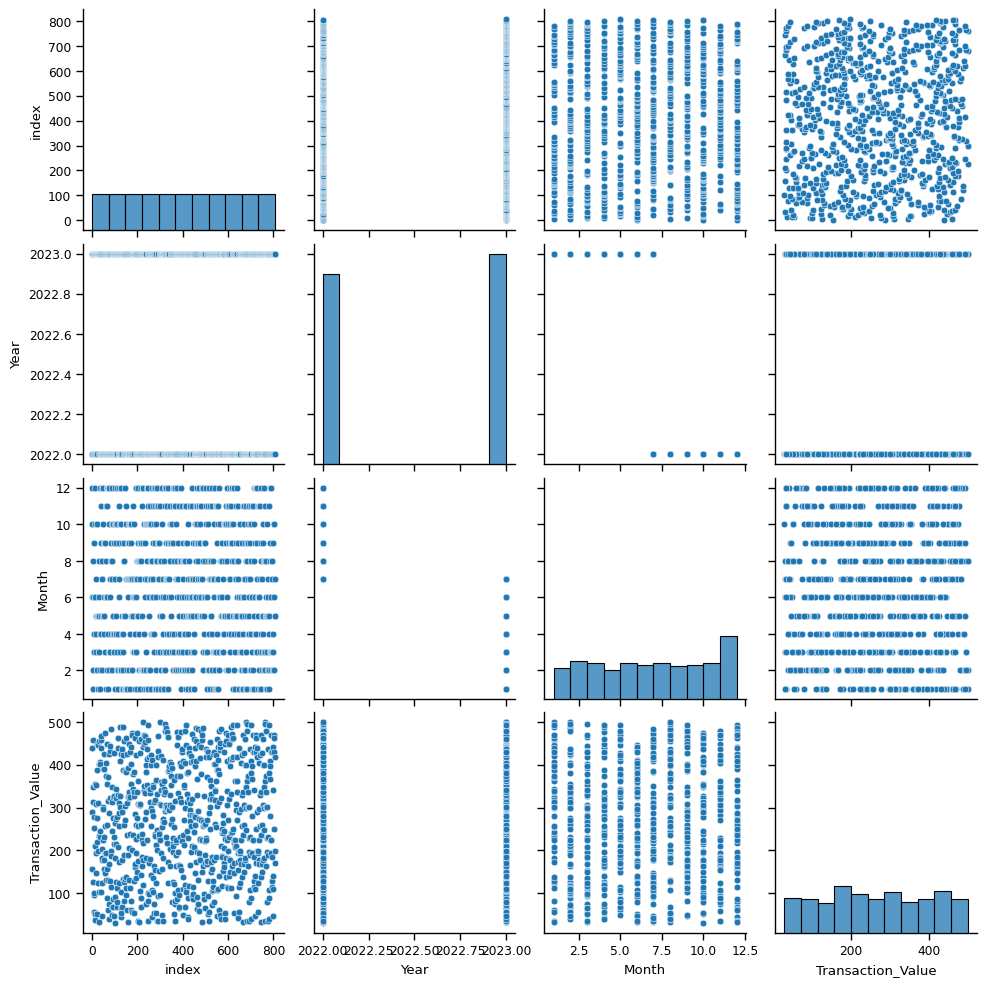

In [63]:
sns.pairplot(dataframe)

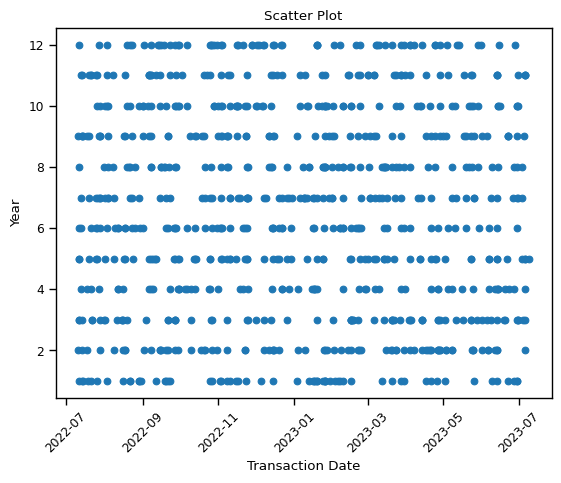

In [65]:
plt.scatter(dataframe['Transaction_Date'], dataframe['Month'])

# Set labels and title
plt.xlabel('Transaction Date')
plt.ylabel('Year')
plt.title('Scatter Plot')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [74]:
dataframe.head()

index Location            Swipe_In           Swipe_Out Working_Date  \
0      0      MUM 2022-10-04 15:23:00 2022-10-05 01:23:00   2022-10-04   
1      1      MUM 2023-06-08 21:17:00 2023-06-09 07:17:00   2023-06-08   
2      2      MGP 2022-12-23 10:18:00 2022-12-23 19:18:00   2022-12-23   
3      3       BB 2022-08-03 18:26:00 2022-08-04 05:26:00   2022-08-03   
4      4      MGP 2023-01-12 12:57:00 2023-01-12 18:57:00   2023-01-12   

  dayofweek_x  Year  Month    Vendor                Date  Transaction_Value  \
0     Tuesday  2022     10  ANTARANG 2022-09-01 07:56:00                289   
1    Thursday  2023      6     SWARA 2023-02-07 04:07:00                440   
2      Friday  2022     12    SUBWAY 2023-03-09 07:48:00                155   
3   Wednesday  2022      8     SWARA 2023-05-29 02:57:00                312   
4    Thursday  2023      1   VOHUMAN 2023-03-13 14:18:00                459   

  Transaction_Date  
0       2022-09-01  
1       2023-02-07  
2       2023-03-09  
3       2023-05-29  
4       2023-03-13

In [178]:
raw_df = dataframe[['Working_Date','Transaction_Value','Vendor','dayofweek_x','Month','Year','Location']]

In [179]:
raw_df['Working_Date'] = pd.to_datetime(raw_df['Working_Date'])

C:\Users\rahul\AppData\Local\Temp\ipykernel_9728\2862114500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df['Working_Date'] = pd.to_datetime(raw_df['Working_Date'])


In [180]:
raw_df.head()

Working_Date  Transaction_Value    Vendor dayofweek_x  Month  Year Location
0   2022-10-04                289  ANTARANG     Tuesday     10  2022      MUM
1   2023-06-08                440     SWARA    Thursday      6  2023      MUM
2   2022-12-23                155    SUBWAY      Friday     12  2022      MGP
3   2022-08-03                312     SWARA   Wednesday      8  2022       BB
4   2023-01-12                459   VOHUMAN    Thursday      1  2023      MGP

In [181]:
raw_df[(raw_df.Vendor == "ANTARANG") ]

Working_Date  Transaction_Value    Vendor dayofweek_x  Month  Year  \
0     2022-10-04                289  ANTARANG     Tuesday     10  2022   
6     2023-02-26                126  ANTARANG      Sunday      2  2023   
11    2023-03-12                 55  ANTARANG      Sunday      3  2023   
14    2023-06-02                 50  ANTARANG      Friday      6  2023   
26    2023-01-11                123  ANTARANG   Wednesday      1  2023   
..           ...                ...       ...         ...    ...   ...   
790   2023-02-07                223  ANTARANG     Tuesday      2  2023   
796   2023-03-14                342  ANTARANG     Tuesday      3  2023   
797   2023-02-28                 45  ANTARANG     Tuesday      2  2023   
800   2022-09-06                441  ANTARANG     Tuesday      9  2022   
803   2022-10-18                469  ANTARANG     Tuesday     10  2022   

    Location  
0        MUM  
6        MGP  
11       MUM  
14        BB  
26       MGP  
..       ...  
790      MUM  
796       BB  
797      MUM  
800      MGP  
803      MUM  

[169 rows x 7 columns]

In [182]:
raw_df[(raw_df.Vendor == "ANTARANG") & (raw_df.Year == 2022) ]

Working_Date  Transaction_Value    Vendor dayofweek_x  Month  Year  \
0     2022-10-04                289  ANTARANG     Tuesday     10  2022   
50    2022-10-12                296  ANTARANG   Wednesday     10  2022   
61    2022-11-20                404  ANTARANG      Sunday     11  2022   
67    2022-11-14                449  ANTARANG      Monday     11  2022   
84    2022-09-22                484  ANTARANG    Thursday      9  2022   
..           ...                ...       ...         ...    ...   ...   
772   2022-10-04                195  ANTARANG     Tuesday     10  2022   
783   2022-12-13                409  ANTARANG     Tuesday     12  2022   
789   2022-12-27                469  ANTARANG     Tuesday     12  2022   
800   2022-09-06                441  ANTARANG     Tuesday      9  2022   
803   2022-10-18                469  ANTARANG     Tuesday     10  2022   

    Location  
0        MUM  
50       MGP  
61        BB  
67       MUM  
84        BB  
..       ...  
772      MUM  
783      MGP  
789      MUM  
800      MGP  
803      MUM  

[88 rows x 7 columns]

In [183]:
raw_df.set_index('Working_Date')

Transaction_Value            Vendor dayofweek_x  Month  Year  \
Working_Date                                                                 
2022-10-04                  289          ANTARANG     Tuesday     10  2022   
2023-06-08                  440             SWARA    Thursday      6  2023   
2022-12-23                  155            SUBWAY      Friday     12  2022   
2022-08-03                  312             SWARA   Wednesday      8  2022   
2023-01-12                  459           VOHUMAN    Thursday      1  2023   
...                         ...               ...         ...    ...   ...   
2022-10-18                  469          ANTARANG     Tuesday     10  2022   
2022-10-11                  462  SOUTHERN EXPRESS     Tuesday     10  2022   
2023-05-02                  171             SWARA     Tuesday      5  2023   
2022-07-12                  419  SOUTHERN EXPRESS     Tuesday      7  2022   
2023-05-02                  199  SOUTHERN EXPRESS     Tuesday      5  2023   

             Location  
Working_Date           
2022-10-04        MUM  
2023-06-08        MUM  
2022-12-23        MGP  
2022-08-03         BB  
2023-01-12        MGP  
...               ...  
2022-10-18        MUM  
2022-10-11        MGP  
2023-05-02        MGP  
2022-07-12        MGP  
2023-05-02        MGP  

[808 rows x 6 columns]

In [184]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Working_Date       808 non-null    datetime64[ns]
 1   Transaction_Value  808 non-null    int64         
 2   Vendor             808 non-null    object        
 3   dayofweek_x        808 non-null    object        
 4   Month              808 non-null    int32         
 5   Year               808 non-null    int32         
 6   Location           808 non-null    object        
dtypes: datetime64[ns](1), int32(2), int64(1), object(3)
memory usage: 38.0+ KB


<Axes: xlabel='Working_Date'>

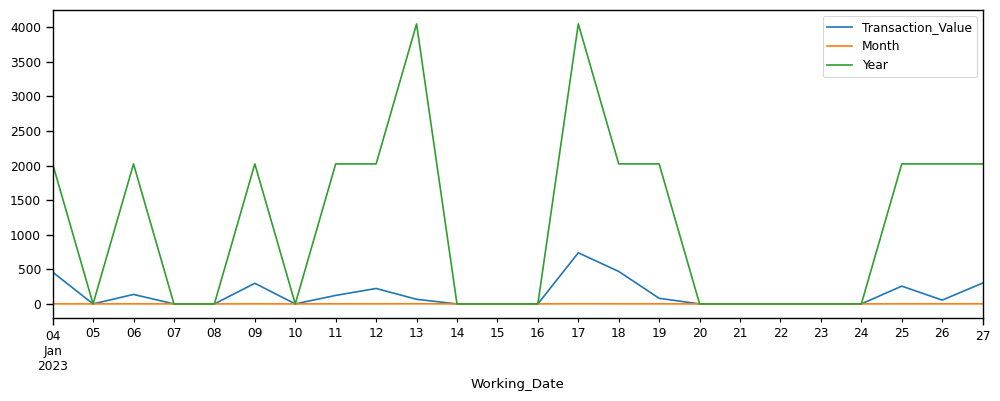

In [185]:
raw_df[(raw_df.Vendor == "ANTARANG") & (raw_df.Month == 1) ].set_index('Working_Date').resample('D').sum().plot(kind='line',figsize=(12,4))

In [186]:
raw_df.head()

Working_Date  Transaction_Value    Vendor dayofweek_x  Month  Year Location
0   2022-10-04                289  ANTARANG     Tuesday     10  2022      MUM
1   2023-06-08                440     SWARA    Thursday      6  2023      MUM
2   2022-12-23                155    SUBWAY      Friday     12  2022      MGP
3   2022-08-03                312     SWARA   Wednesday      8  2022       BB
4   2023-01-12                459   VOHUMAN    Thursday      1  2023      MGP

<Axes: xlabel='Working_Date'>

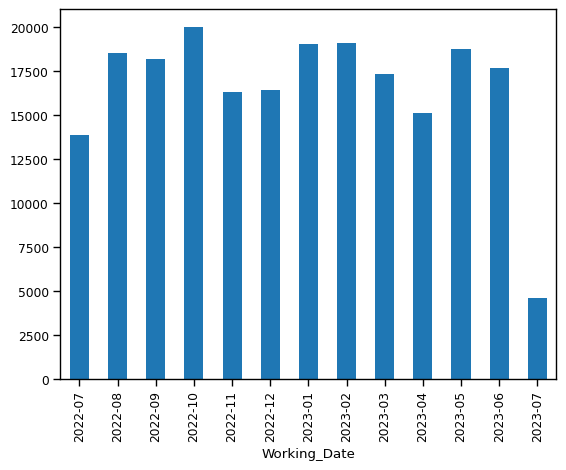

In [187]:
raw_df['Transaction_Value'].groupby(raw_df['Working_Date'].dt.to_period('M')).sum().plot(kind='bar')

In [219]:
df = dataframe['Transaction_Value'].groupby(dataframe['Date'].dt.to_period('D')).sum().to_frame()

In [220]:
#dataframe['Transaction_Value'].groupby(dataframe['Date']).sum().to_frame()

In [221]:
df.Working_Date = df.to_timestamp()

C:\Users\rahul\AppData\Local\Temp\ipykernel_9728\295913564.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.Working_Date = df.to_timestamp()


In [ ]:
df.reset_index(level=0, inplace=True)

In [228]:
df.rename(columns={'Date':'ds','Transaction_Value':'y'}, inplace=True)

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype    
---  ------  --------------  -----    
 0   ds      250 non-null    period[D]
 1   y       250 non-null    int64    
dtypes: int64(1), period[D](1)
memory usage: 4.0 KB


In [234]:
df['ds'] = df['ds'].dt.to_timestamp('s').dt.strftime('%Y-%m-%d %H:%M:%S.000')

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      250 non-null    object
 1   y       250 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.0+ KB


In [236]:
df.head()

ds     y
0  2022-07-11 00:00:00.000   692
1  2022-07-12 00:00:00.000  1746
2  2022-07-13 00:00:00.000  1134
3  2022-07-14 00:00:00.000  2154
4  2022-07-15 00:00:00.000   630

In [237]:
model = Prophet()
model.fit(df)

08:45:22 - cmdstanpy - INFO - Chain [1] start processing
08:45:30 - cmdstanpy - INFO - Chain [1] done processing


In [239]:
future_dates = model.make_future_dataframe(periods=30)

In [242]:
forecast = model.predict(future_dates)

In [243]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


ds        yhat  yhat_lower   yhat_upper
275 2023-08-04  675.213107 -138.828791  1454.862341
276 2023-08-05  557.638075 -291.939315  1377.855635
277 2023-08-06  143.390837 -627.979031   995.757333
278 2023-08-07  553.729222 -314.232393  1375.844326
279 2023-08-08  881.143251   26.493833  1777.601872

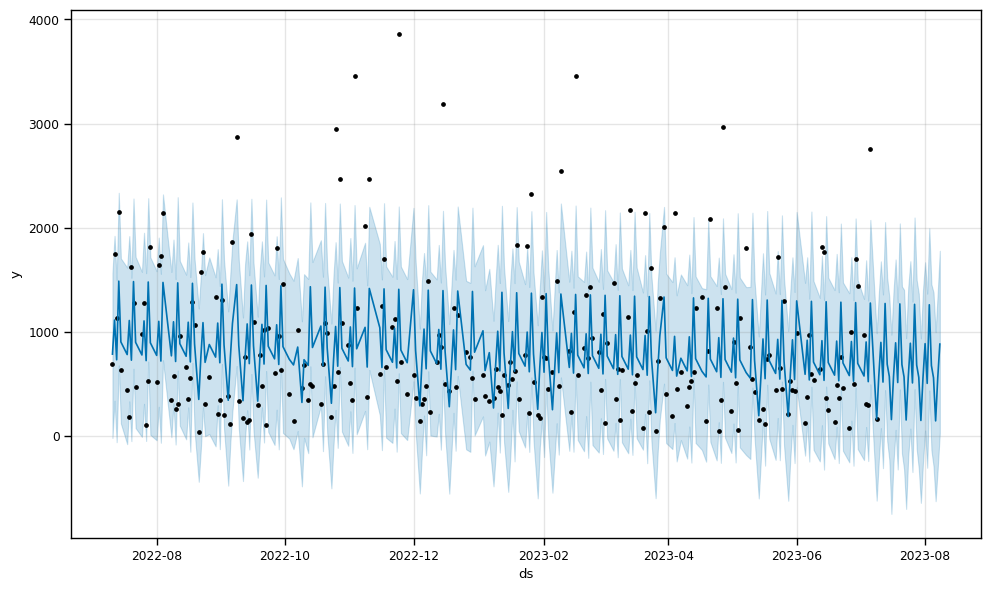

In [245]:
fig1 = model.plot(forecast)


In [246]:
# Prediction for 365 days 
future = model.make_future_dataframe(periods=365)
future.tail()

ds
610 2024-07-04
611 2024-07-05
612 2024-07-06
613 2024-07-07
614 2024-07-08

In [247]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds         yhat  yhat_lower   yhat_upper
610 2024-07-04  1061.079392  255.418392  1899.390336
611 2024-07-05   477.249476 -293.152359  1356.119114
612 2024-07-06   359.674444 -497.785876  1149.703706
613 2024-07-07   -54.572794 -914.331106   719.873473
614 2024-07-08   355.765591 -369.664381  1129.063850

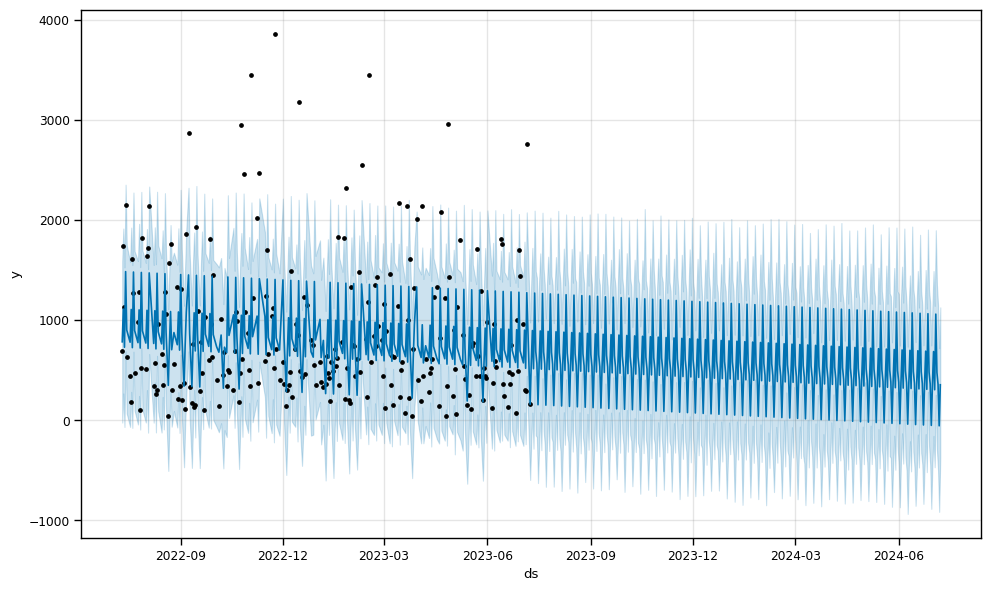

In [248]:
fig1 = model.plot(forecast)


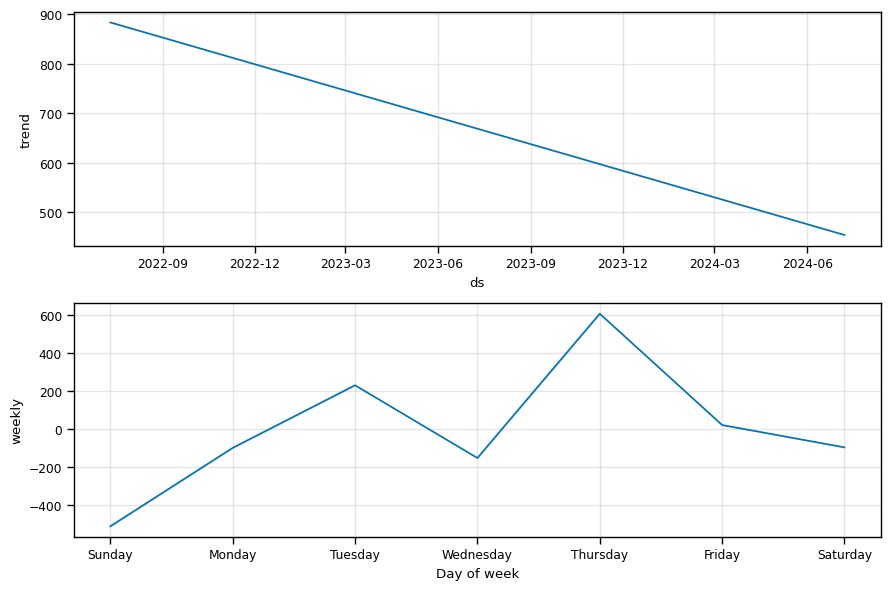

In [249]:
fig2 = model.plot_components(forecast)

#### Interactive 

In [251]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)


In [252]:
plot_components_plotly(model, forecast)